## Testing effects of soil and fire properties on soil microbial communities

In [1]:
library(phyloseq)
library(vegan)
library(plyr)
library(dplyr)
library(ggplot2)

Warning message:
“package ‘vegan’ was built under R version 3.3.2”Loading required package: permute
Loading required package: lattice
This is vegan 2.4-2

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”

In [2]:
# Importing the dataset
ps = import_biom("../OTU_table/feature-table-metaD-tax.biom",parseFunction=parse_taxonomy_greengenes, "../OTU_table/Trees/fulltree.tre")

Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”

In [3]:
# Setting various parameters as combined values
sample_data(ps)$pH = as.numeric(sample_data(ps)$pH)
sample_data(ps)$Total_C_pct = as.numeric(sample_data(ps)$TC_pct)
sample_data(ps)$Total_N_pct = as.numeric(sample_data(ps)$Total_N_pct)
sample_data(ps)$Total_S_pct = as.numeric(sample_data(ps)$Total_S_pct)
sample_data(ps)$Burn_Severity_Index= as.numeric(sample_data(ps)$Burn_Severity_Index)
sample_data(ps)$CBI= as.numeric(sample_data(ps)$CBI)
sample_data(ps)$RBR= as.numeric(sample_data(ps)$RBR)
sample_data(ps)$CFSI= as.numeric(sample_data(ps)$CFSI)
sample_data(ps)$Mean_Duff_Depth_cm = as.numeric(sample_data(ps)$Mean_Duff_Depth_cm)
sample_data(ps)$Understory_CBI= as.numeric(sample_data(ps)$Understory_CBI)
sample_data(ps)$Overstory_CBI= as.numeric(sample_data(ps)$Overstory_CBI)
sample_data(ps)$Overstory_CBI= as.numeric(sample_data(ps)$Overstory_CBI)
sample_data(ps)$Dead_Trees= as.numeric(sample_data(ps)$Dead_Trees)
sample_data(ps)$TotalSeqs=sample_sums(ps)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [4]:
# Pulling out samples from this project only
ps.wb = prune_samples(sample_data(ps)$Project_ID=="WB15", ps)
ps.wb = prune_samples(sample_data(ps.wb)$Org_or_Min %in% c("O","M"), ps.wb)
# Merging lab replicates for analysis
ps.merged = merge_samples(ps.wb, "Sample_ID")

# This sums the OTUs for each sample ID, and averages the sample data
# That's an issue for the non-numeric sample data, so we have to add it back in.
# The code below is probably inefficient, but it works correctly.
names=colnames(sample_data(ps.wb))
notcommonnames = c('Sample_Name','Replicate','Project_ID','Fwd_Primer_Barcode','Rev_Primer_Barcode','Revcomp_Rev_Primer_Barcode')
commonnames = names[(names %in% notcommonnames)]
common_sample_data = sample_data(ps.wb)[ , -which(names(sample_data(ps.wb)) %in% commonnames)]
commonrownames=row.names(sample_data(ps.merged))
common_sample_data2 = common_sample_data[which(common_sample_data$Sample_ID %in% commonrownames),]
common_sample_data2 = common_sample_data2[!duplicated(common_sample_data2$Sample_ID), ]
row.names(common_sample_data2) = common_sample_data2$Sample_ID
sample_data(ps.merged)=common_sample_data2

ps.merged.norm = transform_sample_counts(ps.merged, function(x) x / sum(x) )

minseqs = 1500
ps.merged.norm.min = prune_samples(sample_data(ps.merged.norm)$TotalSeqs>minseqs,ps.merged.norm)

Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMeth

In [5]:
colnames(sample_data(ps.merged.norm.min))

[1] "Al_ICP_mg_kg"                   "Barcode"                       
 [3] "Burn_Severity_Index"            "CBI"                           
 [5] "CEC_cmol_kg"                    "CFSI"                          
 [7] "Ca_ICP_mg_kg"                   "Ca_mg_kg"                      
 [9] "Clay_pct"                       "Cu_ICP_mg_kg"                  
[11] "Dead_Trees"                     "EC_Mineral_mS_cm"              
[13] "EC_Organic_mS_cm"               "Fe_ICP_mg_kg"                  
[15] "Forest"                         "K_ICP_mg_kg"                   
[17] "K_mg_kg"                        "Land_Class"                    
[19] "Live_Trees"                     "Mean_Duff_Depth_cm"            
[21] "Mg_ICP_mg_kg"                   "Mg_mg_kg"                      
[23] "Min_TIC_suspect"                "Mn_ICP_mg_kg"                  
[25] "Mo_ICP_mg_kg"                   "Na_ICP_mg_kg"                  
[27] "Na_mg_kg"                       "O_Depth_cm"                    
[29] "Org_TIC_suspect"                "Org_or_Min"                    
[31] "Overstory_CBI"                  "P_ICP_mg_kg"                   
[33] "Pct_Exposed_Mineral"            "RBR"                           
[35] "S_ICP_mg_kg"                    "Sample_ID"                     
[37] "Sand_pct"                       "Severity_Class"                
[39] "Silt_pct"                       "Site_ID"                       
[41] "TIC_Mineral_pct"                "TIC_Organic_pct"               
[43] "Total_C_Mineral_pct"            "Total_C_Organic_pct"           
[45] "Total_N_Mineral_pct"            "Total_N_Organic_pct"           
[47] "Total_Org_C_Mineral_pct_acid"   "Total_Org_C_Mineral_pct_muffle"
[49] "Total_Org_C_Organic_pct_acid"   "Total_Org_C_Organic_pct_muffle"
[51] "Total_S_Mineral_pct"            "Understory_CBI"                
[53] "Veg_Comm"                       "Zn_ICP_mg_kg"                  
[55] "bui"                            "dc"                            
[57] "dmc"                            "ffmc"                          
[59] "fwi"                            "isi"                           
[61] "nTrees"                         "pH_Mineral"                    
[63] "pH_Organic"                     "precip"                        
[65] "rh"                             "temp"                          
[67] "wdir"                           "ws"                            
[69] "pH"                             "Total_C_pct"                   
[71] "Total_N_pct"                    "TotalSeqs"

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- 6efacd24e6e800ec2cbde0d0acd14c39 -- in the phylogenetic tree in the data you provided.”Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [17955] is not a sub-multiple or multiple of the number of rows [8978]”

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Groups,1,0.01148417,0.011484173,3.514949,0.06379537
Residuals,98,0.32018925,0.003267237,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
          diff        lwr        upr     p adj
O-M 0.02178873 -0.0012743 0.04485176 0.0637954


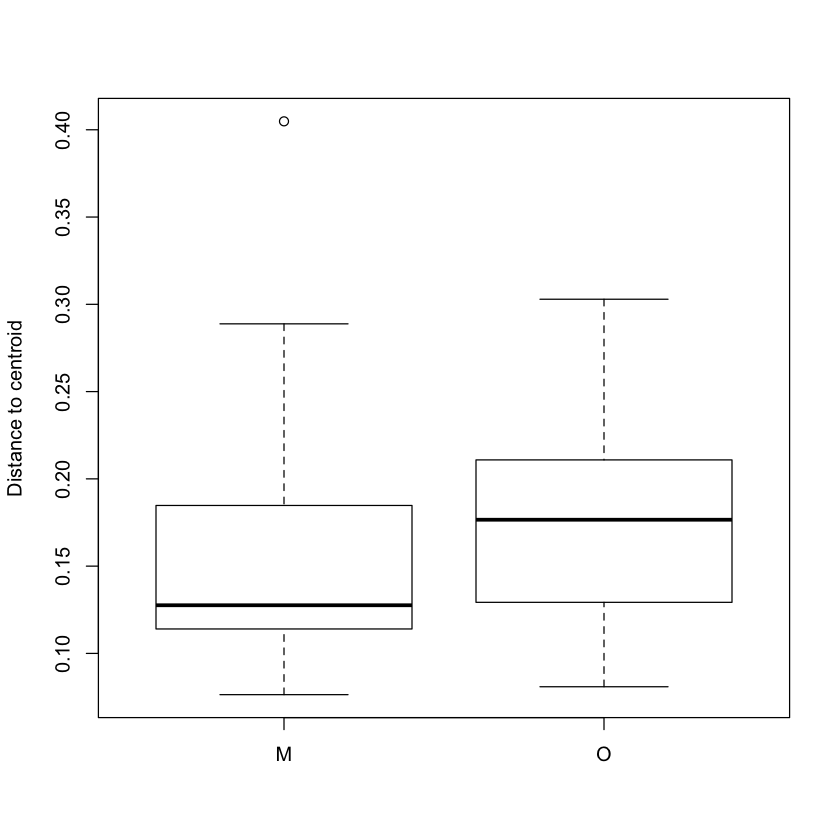

In [7]:
physeq = ps.merged.norm.min
df = as(sample_data(physeq), "data.frame")
d = distance(physeq, method = "unifrac", weighted=TRUE)
sampdat = sample_data(physeq)
groups = as.factor(sampdat$Org_or_Min)
x = betadisper(d, groups)
boxplot(x, ylab = "Distance to centroid")
anova(x)
TukeyHSD(x, ordered = FALSE, conf.level = 0.95)
# Performing test of beta dispersion - the permanova/adonis test requires that groups have similar dispersion.
# This doesn't look outrageously bad here for the different vegetation communities - no significant differences.
# Looks generally okay for Severity_Class
# Land_Class has an issue - classes have significantly diff betadispersion
# Mineral / Organic also have diff betadispersion

In [14]:
sample_data(physeq)$Land_Class

[1] "Wetland" "Wetland" "Upland"  "Upland"  "Upland"  "Upland"  "Upland" 
 [8] "Upland"  "Wetland" "Wetland" "Upland"  "Upland"  "Upland"  "Upland" 
[15] "Wetland" "Upland"  "Upland"  "Wetland" "Wetland" "Upland"  "Upland" 
[22] "Upland"  "Wetland" "Wetland" "Upland"  "Upland"  "Upland"  "Upland" 
[29] "Upland"  "Upland"  "Upland"  "Upland"  "Upland"  "Upland"  "Wetland"
[36] "Wetland" "Upland"  "Upland"  "Wetland" "Upland"  "Upland"  "Upland" 
[43] "Wetland" "Upland"  "Upland"  "Wetland" "Wetland" "Wetland" "Wetland"
[50] "Upland"  "Upland"  "Upland"  "Upland"  "Upland"  "Upland"  "Wetland"
[57] "Wetland" "Upland"  "Upland"  "Wetland" "Upland"  "Upland"  "Upland" 
[64] "Upland"  "Upland"  "Upland"  "Upland"  "Upland"  "Upland"  "Upland" 
[71] "Upland"  "Upland"  "Upland"  "Upland"  "Upland"  "Wetland" "Upland" 
[78] "Upland"  "Upland"  "Upland"  "Upland"  "Upland"  "Upland"  "Upland" 
[85] "Upland"  "Upland"  "Upland"  "Upland"  "Upland"  "Upland"  "Upland" 
[92] "Upland"  "Upland"

In [16]:
physeq = prune_samples(!is.na(sample_data(ps.merged.norm.min)$pH), ps.merged.norm.min)
df = as(sample_data(physeq), "data.frame")
d = distance(physeq, method = "unifrac", weighted=TRUE)

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- 6ebe8e91a935bb1bfd62b6358e806e78 -- in the phylogenetic tree in the data you provided.”Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [17955] is not a sub-multiple or multiple of the number of rows [8978]”

In [42]:
d.adonis = adonis(d ~ sample_data(physeq)$Land_Class +sample_data(physeq)$Veg_Comm + sample_data(physeq)$pH + sample_data(physeq)$Org_or_Min + sample_data(physeq)$Burned_Unburned + sample_data(physeq)$fwi, df)
d.adonis


Call:
adonis(formula = d ~ sample_data(physeq)$Land_Class + sample_data(physeq)$Veg_Comm +      sample_data(physeq)$pH + sample_data(physeq)$Org_or_Min +      sample_data(physeq)$Burned_Unburned + sample_data(physeq)$fwi,      data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                                    Df SumsOfSqs  MeanSqs F.Model      R2
sample_data(physeq)$Land_Class       1   0.09815 0.098155 10.5544 0.06274
sample_data(physeq)$Veg_Comm         3   0.13440 0.044801  4.8174 0.08591
sample_data(physeq)$pH               1   0.14080 0.140802 15.1401 0.09000
sample_data(physeq)$Org_or_Min       1   0.08337 0.083373  8.9649 0.05329
sample_data(physeq)$Burned_Unburned  1   0.11015 0.110154 11.8446 0.07041
sample_data(physeq)$fwi             48   0.65347 0.013614  1.4639 0.41770
Residuals                           37   0.34410 0.009300         0.21995
Total                               92   1.56445                  1.00000
    